In [1]:
# Dependencies and set up
import pandas as pd
import numpy as np

In [2]:
# Reading csv
table = pd.read_csv('../Resources/Crimes_-_2001_to_Present.csv')
table.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,-87.670000,"(41.815117282, -87.669999562)",29.0,14924.0,59.0,706.0,3.0,37.0,23.0,108.0
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,-87.765400,"(41.895080471, -87.765400451)",4.0,4299.0,26.0,562.0,45.0,5.0,25.0,67.0
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,-87.716650,"(41.937405765, -87.716649687)",15.0,21538.0,22.0,216.0,12.0,39.0,7.0,168.0
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,-87.755121,"(41.881903443, -87.755121152)",11.0,22216.0,26.0,696.0,23.0,32.0,25.0,81.0


In [3]:
table.shape

(7407479, 30)

In [42]:
x =table.Date.iloc[0]
x[6:9]='1971'
x

TypeError: 'str' object does not support item assignment

In [4]:
# Dropping NA
table.dropna(inplace=True)
table.shape

(6692644, 30)

In [5]:
# Primary type value counts
table.value_counts(subset=['Primary Type'])

Primary Type                     
THEFT                                1409837
BATTERY                              1231503
CRIMINAL DAMAGE                       766726
NARCOTICS                             661117
ASSAULT                               431406
OTHER OFFENSE                         416061
BURGLARY                              376987
MOTOR VEHICLE THEFT                   304797
DECEPTIVE PRACTICE                    279024
ROBBERY                               252565
CRIMINAL TRESPASS                     188689
WEAPONS VIOLATION                      86711
PROSTITUTION                           60816
PUBLIC PEACE VIOLATION                 47429
OFFENSE INVOLVING CHILDREN             46293
SEX OFFENSE                            24415
CRIM SEXUAL ASSAULT                    24216
INTERFERENCE WITH PUBLIC OFFICER       17114
GAMBLING                               13369
LIQUOR LAW VIOLATION                   12421
ARSON                                  11133
HOMICIDE             

In [27]:
# Date format
#table.dates = pd.to_datetime(table.Date)
table.IUCR.dtypes

dtype('O')

In [31]:
table['hour'] = table.new_date.apply(lambda x:x.hour)
table.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,dates,new_date,hour
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,14924.0,59.0,706.0,3.0,37.0,23.0,108.0,2015-09-05 13:30:00,2015-09-05 13:30:00,13
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,4299.0,26.0,562.0,45.0,5.0,25.0,67.0,2015-09-04 11:30:00,2015-09-04 11:30:00,11
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,21538.0,22.0,216.0,12.0,39.0,7.0,168.0,2015-09-05 12:45:00,2015-09-05 12:45:00,12
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,22216.0,26.0,696.0,23.0,32.0,25.0,81.0,2015-09-05 13:00:00,2015-09-05 13:00:00,13
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21554.0,70.0,575.0,13.0,59.0,20.0,237.0,2015-09-05 10:55:00,2015-09-05 10:55:00,10


In [35]:
table['new_date_year'] = table.new_date.apply(lambda x:x.replace(year=2015))
table.head()

ValueError: day is out of range for month

In [44]:
130 * 12 * 3750000

5850000000

In [45]:
table.corr()


,ID,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,...,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,hour
ID,1.000000,-0.080722,0.063190,-0.036981,-0.005271,0.019630,-0.008723,0.005121,0.001973,0.984792,...,0.005192,0.007640,-0.005428,0.007478,-0.001106,0.011989,0.012101,0.005883,-0.004995,-0.009498
Arrest,-0.080722,1.000000,-0.067751,-0.017948,-0.018468,-0.017733,-0.001812,-0.034877,-0.002854,-0.083541,...,-0.035191,-0.007391,0.004020,-0.029240,0.006904,-0.017026,0.003163,0.063987,-0.008471,0.080778
Domestic,0.063190,-0.067751,1.000000,-0.045720,-0.042369,-0.054182,0.077621,0.007768,-0.084869,0.065929,...,0.006490,0.001183,0.034710,0.021156,0.002090,-0.020221,0.014623,0.034211,0.075376,-0.032389
Beat,-0.036981,-0.017948,-0.045720,1.000000,0.948404,0.640331,-0.502104,-0.511666,0.637216,-0.039003,...,-0.506246,-0.114914,-0.105083,-0.184252,0.015583,0.081741,-0.338051,-0.611562,-0.403306,-0.007767
District,-0.005271,-0.018468,-0.042369,0.948404,1.000000,0.685997,-0.496257,-0.560817,0.644617,-0.006791,...,-0.555714,-0.081246,-0.093532,-0.127165,0.021287,0.097386,-0.337755,-0.657709,-0.386232,-0.007751
Ward,0.019630,-0.017733,-0.054182,0.640331,0.685997,1.000000,-0.530084,-0.462715,0.651644,0.018769,...,-0.456669,-0.040241,-0.128393,-0.136441,0.062044,0.048090,-0.204773,-0.502070,-0.526991,-0.004485
Community Area,-0.008723,-0.001812,0.077621,-0.502104,-0.496257,-0.530084,1.000000,0.266037,-0.778431,-0.008909,...,0.256483,0.086213,0.100422,0.699469,0.065356,-0.205598,0.209452,0.307197,0.617140,0.002888
X Coordinate,0.005121,-0.034877,0.007768,-0.511666,-0.560817,-0.462715,0.266037,1.000000,-0.559050,0.006545,...,0.999919,0.115910,0.049287,0.167064,-0.082467,0.089327,0.133545,0.277873,0.414664,-0.001940
Y Coordinate,0.001973,-0.002854,-0.084869,0.637216,0.644617,0.651644,-0.778431,-0.559050,1.000000,0.001447,...,-0.548477,-0.114553,-0.166486,-0.489254,-0.026149,0.043438,-0.232576,-0.387962,-0.780105,-0.005056
Year,0.984792,-0.083541,0.065929,-0.039003,-0.006791,0.018769,-0.008909,0.006545,0.001447,1.000000,...,0.006620,0.007460,-0.005783,0.006415,-0.001501,0.011815,0.012801,0.007540,-0.005103,-0.009895


<AxesSubplot:xlabel='new_date'>

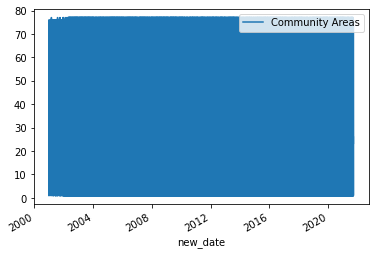

In [28]:
table.plot(kind='line',x='new_date', y='Community Areas')

In [12]:
# Replacing primary types
table.loc[table['Primary Type'] == 'OBSCENITY', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'PUBLIC INDECENCY', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'NON-CRIMINAL', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'OTHER NARCOTIC VIOLATION', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'HUMAN TRAFFICKING', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'NON - CRIMINAL', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'RITUALISM', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'DOMESTIC VIOLENCE', 'Primary Type'] = 'OTHER'
table.loc[table['Primary Type'] == 'CONCEALED CARRY LICENSE VIOLATION', 'Primary Type'] = 'OTHER'

In [13]:
# Primary type value counts
table.value_counts(subset=['Primary Type'])

Primary Type                    
THEFT                               1409659
BATTERY                             1231387
CRIMINAL DAMAGE                      766658
NARCOTICS                            661110
ASSAULT                              431339
OTHER OFFENSE                        415997
BURGLARY                             376957
MOTOR VEHICLE THEFT                  304759
DECEPTIVE PRACTICE                   278961
ROBBERY                              252541
CRIMINAL TRESPASS                    188674
WEAPONS VIOLATION                     86684
PROSTITUTION                          60816
PUBLIC PEACE VIOLATION                47428
OFFENSE INVOLVING CHILDREN            46281
SEX OFFENSE                           24407
CRIM SEXUAL ASSAULT                   24216
INTERFERENCE WITH PUBLIC OFFICER      17113
GAMBLING                              13369
LIQUOR LAW VIOLATION                  12421
ARSON                                 11132
HOMICIDE                              11021

In [14]:
# Columns
list(table.columns)

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location',
 'Historical Wards 2003-2015',
 'Zip Codes',
 'Community Areas',
 'Census Tracts',
 'Wards',
 'Boundaries - ZIP Codes',
 'Police Districts',
 'Police Beats']

In [15]:
# Dropping columns
table.drop(['ID', 'Case Number', 'Block', 'IUCR', 'Description', 'Beat', 'Wards', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Location', 'Historical Wards 2003-2015','Community Areas', 'Census Tracts', 'Boundaries - ZIP Codes', 'Police Districts', 'Police Beats'], axis = 1, inplace = True)
list(table.columns)

['Date',
 'Primary Type',
 'Location Description',
 'Arrest',
 'Domestic',
 'Ward',
 'Year',
 'Latitude',
 'Longitude',
 'Zip Codes']

In [16]:
# Identifying 'Location Description'
df = table.drop_duplicates(subset = 'Location Description', keep = 'first')
df = df['Location Description']
df

0                                  RESIDENCE
1                                    CTA BUS
3                                   SIDEWALK
4                                  APARTMENT
6                           RESIDENCE-GARAGE
                         ...                
3225103                         BANQUET HALL
5349596                         LOADING DOCK
6823433                   CTA SUBWAY STATION
6888299                    BOAT / WATERCRAFT
7033250    VEHICLE - COMMERCIAL: TROLLEY BUS
Name: Location Description, Length: 214, dtype: object

In [17]:
# Adding the column 'LD'
table['LD']= ''

In [18]:
# Modifiying 'Location Description' from 214 to 13 variables

In [19]:
table.loc[table['Location Description'] == 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT EXTERIOR - NON-SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT EXTERIOR - SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT TRANSPORTATION SYSTEM (ATS)', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT VENDING ESTABLISHMENT', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRPORT/AIRCRAFT', 'LD'] = 'AIRPORT'
table.loc[table['Location Description'] == 'AIRCRAFT', 'LD'] = 'AIRPORT'

In [20]:
table.loc[table['Location Description'] == 'CHURCH', 'LD'] = 'CHURCH'
table.loc[table['Location Description'] == 'CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'LD'] = 'CHURCH'
table.loc[table['Location Description'] == 'CHURCH PROPERTY', 'LD'] = 'CHURCH'
table.loc[table['Location Description'] == 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'LD'] = 'CHURCH'

In [21]:
table.loc[table['Location Description'] == 'APPLIANCE STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'ATHLETIC CLUB', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'BANK', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'BANQUET HALL', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'BARBER SHOP/BEAUTY SALON', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'BARBERSHOP', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'BOWLING ALLEY', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'CLEANERS/LAUNDROMAT', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'CLEANING STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'CLUB', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'COIN OPERATED MACHINE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'COMMERCIAL / BUSINESS OFFICE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'CONVENIENCE STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'CREDIT UNION', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'CURRENCY EXCHANGE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'DEPARTMENT STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'DRUG STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'FACTORY', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'FACTORY / MANUFACTURING BUILDING', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'FACTORY/MANUFACTURING BUILDING', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'FARM', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'FUNERAL PARLOR', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'GARAGE/AUTO REPAIR', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'GAS STATION', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'GAS STATION DRIVE/PROP.', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'GROCERY FOOD STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'HALLWAY', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'HORSE STABLE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'KENNEL', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'LAUNDRY ROOM', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'LIQUOR STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'MOTEL', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'OFFICE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'PAWN SHOP', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'RESTAURANT', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'RETAIL STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'SAVINGS AND LOAN', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'SMALL RETAIL STORE', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'TRUCKING TERMINAL', 'LD'] = 'COMMERCIAL BUILDING'
table.loc[table['Location Description'] == 'WAREHOUSE', 'LD'] = 'COMMERCIAL BUILDING'

In [22]:
table.loc[table['Location Description'] == 'CTA "L" PLATFORM', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA "L" TRAIN', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA BUS', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA BUS STOP', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA GARAGE / OTHER PROPERTY', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA PLATFORM', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA PROPERTY', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA STATION','LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA SUBWAY STATION', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA TRACKS - RIGHT OF WAY', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA TRAIN', 'LD'] = 'CTA'
table.loc[table['Location Description'] == 'CTA PARKING LOT / GARAGE / OTHER PROPERTY', 'LD'] = 'CTA'

In [23]:
table.loc[table['Location Description'] == 'COLLEGE / UNIVERSITY - GROUNDS', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'COLLEGE / UNIVERSITY - RESIDENCE HALL', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'COLLEGE/UNIVERSITY GROUNDS', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'DAY CARE CENTER', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'PUBLIC GRAMMAR SCHOOL', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'PUBLIC HIGH SCHOOL', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL - PRIVATE BUILDING', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL - PRIVATE GROUNDS', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL - PUBLIC BUILDING', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL - PUBLIC GROUNDS', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL YARD', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL, PRIVATE, BUILDING', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL, PRIVATE, GROUNDS', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL, PUBLIC, BUILDING', 'LD'] = 'EDUCATIONAL BUILDING'
table.loc[table['Location Description'] == 'SCHOOL, PUBLIC, GROUNDS', 'LD'] = 'EDUCATIONAL BUILDING'

In [24]:
table.loc[table['Location Description'] == 'COUNTY JAIL', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'FEDERAL BUILDING', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'FIRE STATION', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'FOREST PRESERVE', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'GOVERNMENT BUILDING', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'GOVERNMENT BUILDING / PROPERTY', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'GOVERNMENT BUILDING/PROPERTY', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'JAIL / LOCK-UP FACILITY', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'PARK PROPERTY', 'LD'] = 'FEDERAL PROPERTY'
table.loc[table['Location Description'] == 'RAILROAD PROPERTY', 'LD'] = 'FEDERAL PROPERTY'

In [25]:
table.loc[table['Location Description'] == 'ANIMAL HOSPITAL', 'LD'] = 'HOSPITAL'
table.loc[table['Location Description'] == 'HOSPITAL', 'LD'] = 'HOSPITAL'
table.loc[table['Location Description'] == 'HOSPITAL BUILDING / GROUNDS', 'LD'] = 'HOSPITAL'
table.loc[table['Location Description'] == 'HOSPITAL BUILDING/GROUNDS', 'LD'] = 'HOSPITAL'
table.loc[table['Location Description'] == 'MEDICAL / DENTAL OFFICE', 'LD'] = 'HOSPITAL'
table.loc[table['Location Description'] == 'MEDICAL/DENTAL OFFICE', 'LD'] = 'HOSPITAL'
table.loc[table['Location Description'] == 'NURSING / RETIREMENT HOME', 'LD'] = 'HOSPITAL'
table.loc[table['Location Description'] == 'NURSING HOME', 'LD'] = 'HOSPITAL'
table.loc[table['Location Description'] == 'NURSING HOME/RETIREMENT HOME', 'LD'] = 'HOSPITAL'

In [26]:
table.loc[table['Location Description'] == 'HOTEL', 'LD'] = 'HOTEL'
table.loc[table['Location Description'] == 'HOTEL / MOTEL', 'LD'] = 'HOTEL'
table.loc[table['Location Description'] == 'HOTEL/MOTEL', 'LD'] = 'HOTEL'

In [27]:
table.loc[table['Location Description'] == 'OTHER', 'LD'] = 'OTHER'
table.loc[table['Location Description'] == 'OTHER (SPECIFY)', 'LD'] = 'OTHER'
table.loc[table['Location Description'] == 'OTHER RAILROAD PROP / TRAIN DEPOT', 'LD'] = 'OTHER'
table.loc[table['Location Description'] == 'OTHER RAILROAD PROPERTY / TRAIN DEPOT', 'LD'] = 'OTHER'
table.loc[table['Location Description'] == 'COACH HOUSE', 'LD'] = 'OTHER'
table.loc[table['Location Description'] == 'GANGWAY', 'LD'] = 'OTHER'
table.loc[table['Location Description'] == 'LIBRARY', 'LD'] = 'OTHER'

In [28]:
table.loc[table['Location Description'] == 'BAR OR TAVERN', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'MOVIE HOUSE / THEATER', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'MOVIE HOUSE/THEATER', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'POOL ROOM', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'POOLROOM', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'SPORTS ARENA / STADIUM', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'SPORTS ARENA/STADIUM', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'TAVERN', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'TAVERN / LIQUOR STORE', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'TAVERN/LIQUOR STORE', 'LD'] = 'PUBLIC ENTERTAINMENT'
table.loc[table['Location Description'] == 'YMCA', 'LD'] = 'PUBLIC ENTERTAINMENT'

In [29]:
table.loc[table['Location Description'] == 'ABANDONED BUILDING', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'AIRPORT PARKING LOT', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'ALLEY', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'ATM (AUTOMATIC TELLER MACHINE)', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'BRIDGE', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'CAR WASH', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'CEMETARY', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'CONSTRUCTION SITE', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'DRIVEWAY', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'DUMPSTER', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'EXPRESSWAY EMBANKMENT', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'HIGHWAY / EXPRESSWAY', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'HIGHWAY/EXPRESSWAY', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'JUNK YARD/GARBAGE DUMP', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'LAGOON', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'LAKE', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'LAKEFRONT / WATERFRONT / RIVERBANK', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'LAKEFRONT/WATERFRONT/RIVERBANK', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'LIVERY AUTO', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'LIVERY STAND OFFICE', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'LOADING DOCK', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'NEWSSTAND', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'PARKING LOT', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'PARKING LOT/GARAGE(NON.RESID.)', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'POLICE FACILITY / VEHICLE PARKING LOT', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'POLICE FACILITY/VEH PARKING LOT', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'PRAIRIE', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'RIVER', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'RIVER BANK', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'SEWER', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'SIDEWALK', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'STREET', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'VACANT LOT', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'VACANT LOT / LAND', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'VACANT LOT/LAND', 'LD'] = 'PUBLIC OPEN SPACE'
table.loc[table['Location Description'] == 'WOODED AREA', 'LD'] = 'PUBLIC OPEN SPACE'

In [30]:
table.loc[table['Location Description'] == 'CHA PARKING LOT', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA PARKING LOT / GROUNDS', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA PARKING LOT/GROUNDS', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'APARTMENT', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'BASEMENT', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA APARTMENT', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA BREEZEWAY', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA ELEVATOR', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA GROUNDS', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA HALLWAY', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA HALLWAY / STAIRWELL / ELEVATOR', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA HALLWAY/STAIRWELL/ELEVATOR', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA LOBBY', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA PLAY LOT', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'CHA STAIRWELL', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'DRIVEWAY - RESIDENTIAL', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'ELEVATOR', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'GARAGE', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'HOUSE', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'PORCH', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'RESIDENCE', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'RESIDENCE - GARAGE', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'RESIDENCE - PORCH / HALLWAY', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'RESIDENCE - YARD (FRONT / BACK)', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'RESIDENCE PORCH/HALLWAY', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'RESIDENCE-GARAGE', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'RESIDENTIAL YARD (FRONT/BACK)', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'ROOMING HOUSE', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'STAIRWELL', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'VESTIBULE', 'LD'] = 'RESIDENCE'
table.loc[table['Location Description'] == 'YARD', 'LD'] = 'RESIDENCE'

In [31]:
table.loc[table['Location Description'] == 'AUTO', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'AUTO / BOAT / RV DEALERSHIP', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'BOAT / WATERCRAFT', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'BOAT/WATERCRAFT', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'DELIVERY TRUCK', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'OTHER COMMERCIAL TRANSPORTATION', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'TAXI CAB', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'TAXICAB', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'TRAILER', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'TRUCK', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE - COMMERCIAL', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE - COMMERCIAL: TROLLEY BUS', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE - DELIVERY TRUCK', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE - OTHER RIDE SERVICE', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE NON-COMMERCIAL', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE-COMMERCIAL', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS', 'LD'] = 'VEHICLE'
table.loc[table['Location Description'] == 'VEHICLE-COMMERCIAL - TROLLEY BUS', 'LD'] = 'VEHICLE'

In [32]:
# Identifying 'LD'
df = table.drop_duplicates(subset = 'LD', keep = 'first')
df = df['LD']
df

0                 RESIDENCE
1                       CTA
3         PUBLIC OPEN SPACE
7       COMMERCIAL BUILDING
17                    OTHER
28                  VEHICLE
77         FEDERAL PROPERTY
87                 HOSPITAL
119                   HOTEL
178    PUBLIC ENTERTAINMENT
184                  CHURCH
700    EDUCATIONAL BUILDING
938                 AIRPORT
Name: LD, dtype: object

In [33]:
# Dropping 'Location Description' column
table.drop(['Location Description'], axis = 1, inplace = True)

In [34]:
# Renaming 'LD' as 'Location Description' column
table.rename(columns={'LD': 'Location Description',}, inplace=True, errors='raise')

In [35]:
# Adding months to table as Intiger and renaming columns
table['Month'] = table['Date'].str[0:2].astype(int)

In [36]:
# Adding hours to table as Intiger and renaming columns
table['Hour'] = table['Date'].str[3:5].astype(int)

In [37]:
# Dropping 'Date' column
table.drop(['Date'], axis = 1, inplace = True)
table.head()

,Primary Type,Arrest,Domestic,Ward,Year,Latitude,Longitude,Zip Codes,Location Description,Month,Hour
0,BATTERY,False,True,12.0,2015,41.815117,-87.670000,14924.0,RESIDENCE,9,5
1,THEFT,False,False,29.0,2015,41.895080,-87.765400,4299.0,CTA,9,4
3,NARCOTICS,True,False,35.0,2015,41.937406,-87.716650,21538.0,PUBLIC OPEN SPACE,9,5
4,ASSAULT,False,True,28.0,2015,41.881903,-87.755121,22216.0,RESIDENCE,9,5
5,BURGLARY,False,False,21.0,2015,41.744379,-87.658431,21554.0,RESIDENCE,9,5


In [39]:
# Outing as csv
table.to_csv(r'../Resources/chicago_crime_db.csv', index = False)